In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def leggi_dati(path):
    x = []
    y = []
    yerr = []
    with open(path, 'r') as f:
        for riga in f:
            parts = riga.strip().split()
            if len(parts) != 3:
                continue
            xi, yi, ei = map(float, parts)
            x.append(xi)
            y.append(yi)
            yerr.append(ei)
    return np.array(x), np.array(y), np.array(yerr)

In [4]:
def leggi_dati_barre(path):
    x = []
    y = []
    yerr = []
    with open(path, 'r') as f:
        for riga in f:
            parts = riga.strip().split()
            if len(parts) != 3:
                continue
            xi, yi, ei = map(float, parts)
            x.append(xi)
            y.append(yi)
            yerr.append(ei)
    return np.array(x), np.array(y), np.array(yerr)

In [5]:
def leggi_dati_histo(filename, indice):
    valori = []
    with open(filename, "r") as file:
        for riga in file:
            parti = riga.strip().split()
            if len(parti) < 2:
                continue
            try:
                primo, secondo = float(parti[0]), float(parti[1])
                if primo == indice:
                    valori.append(secondo)
            except ValueError:
                # Se la conversione fallisce, salta la riga
                continue
    return valori

filenames = ["OUTPUT/results_central_limit_standard.dat",
           "OUTPUT/results_central_limit_exp.dat",
           "OUTPUT/results_central_limit_lorentz.dat"]
indexes = [1,2,10,100]

In [62]:
def plot_gaussian(mu, sigma, n_points=500):
    # intervallo: mu ± 4σ copre ~99.7% della distribuzione
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, n_points)
    
    # formula della gaussiana
    y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    
    return x,y

def plot_lorentzian(mu, gamma, n_points=500):
    # intervallo: mu ± 4σ copre ~99.7% della distribuzione
    x = np.linspace(-20, 20, n_points)
    
    # formula della gaussiana
    y = (gamma/np.pi)*(1/(x**2 + gamma**2))
    
    return x,y


# Esercizio 1.1

***

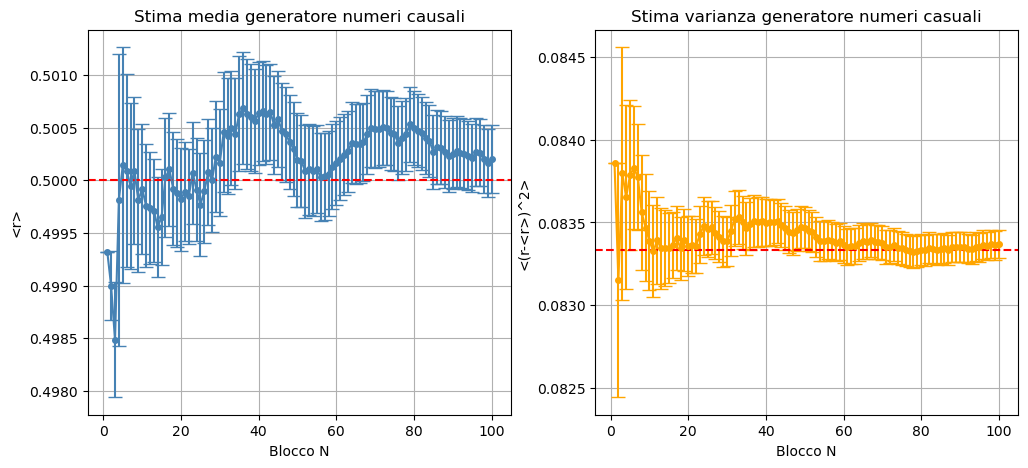

In [22]:
# Leggi i due file
x1, y1, err1 = leggi_dati('OUTPUT/results_mean.dat')
x2, y2, err2 = leggi_dati('OUTPUT/results_var.dat')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.errorbar(x1, y1, yerr=err1, fmt='o-', capsize=5, markersize = 4, label='Stima 1 passo', color='steelblue')
ax1.set_title("Stima media generatore numeri causali")
ax1.set_xlabel("Blocco N")
ax1.set_ylabel("<r>")
ax1.axhline(y=1/2, color='red', linestyle='--')
ax1.grid(True)

ax2.errorbar(x2, y2, yerr=err2, fmt='o-', capsize=5, markersize = 4, color='orange')
ax2.set_title("Stima varianza generatore numeri casuali")
ax2.set_xlabel("Blocco N")
ax2.set_ylabel("<(r-<r>)^2>")
ax2.axhline(y=1/12, color='red', linestyle='--')
ax2.grid(True)


## Media e scarto quadratico medio
Lo scopo dell'esercizio è quello di testare il generatore di numeri causali fornito. In questa parte dell'esercizio ho generato un milione di numeri campionati uniformemente tra 0 ed 1. I dati sono stati raggruppati in blocchi da 10000 dati in modo da ottenere 100 blocchi. Seguendo la logica del data blocking ho quindi valutato la media dei valori generati in ogni blocco. Ottenuta la stima locale ho quindi ottenuto la stima runtime ad ogni passo mediando le medie di blocco locali. L'incertezza runtime della miglior stima segue la formula dell'errore associato alla media riportata nel notebook di presentazione della lezione.

Nel primo grafico si nota come il valore medio dei numeri generati si discosta dal valore vero solo entro l'incertezza stimata.

Stessa osservazione vale per il secondo grafico che stima lo scarto quadratico medio rispetto al valore vero dei valori generati. Anche in questo caso lo scarto stimato risulta discostato dal valore vero di 1/12 entro l'incertezza stimata.

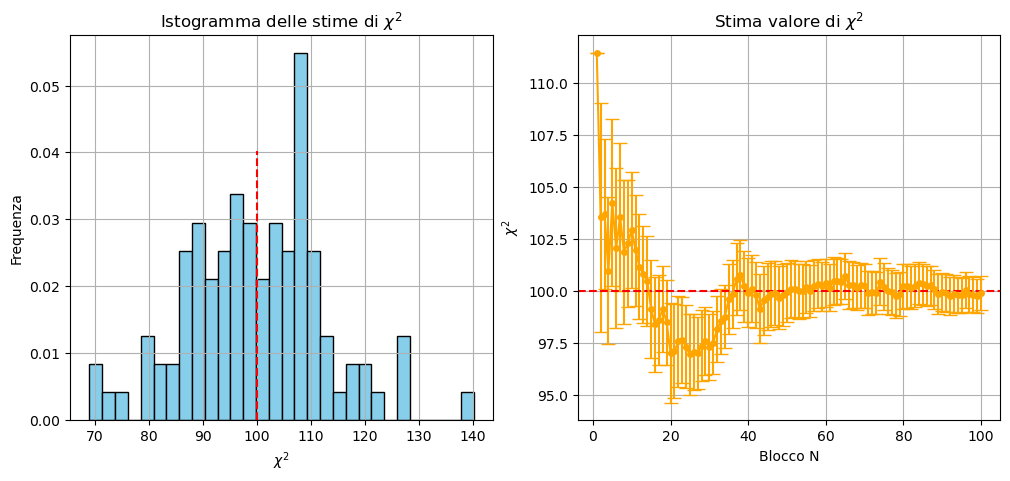

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

data = np.loadtxt('OUTPUT/results_chi_histo.dat', delimiter=None, dtype=float, comments='#')
ax1.hist(data, bins=30, density = True, color='skyblue', edgecolor='black')
ax1.set_title('Istogramma delle stime di 'r'$\chi^2$')
ax1.set_xlabel(r'$\chi^2$')
ax1.set_ylabel('Frequenza')
ax1.axvline(x=100, color='red', linestyle='--')
ax1.grid(True)

x2, y2, err2 = leggi_dati_barre('OUTPUT/results_chi_graph.dat')

ax2.errorbar(x2, y2, yerr=err2, fmt='o-', capsize=5, markersize = 4, label='Stima 1 passo', color='orange')
ax2.set_title("Stima valore di "r'$\chi^2$')
ax2.set_xlabel("Blocco N")
ax2.set_ylabel(r'$\chi^2$')
ax2.axhline(y=100, color='red', linestyle='--')
ax2.grid(True)


## Chi quadro
L'ultimo punto richiesto è quello di valutare il chi quadro in modo da avere una stima di quanto i dati generati seguano l'ipotesi di distribuzione uniforme.

Ho diviso l'intervallo $[0,1]$ in 100 sottointervalli. Ho utilizzato poi il set di dati generati per il punto precedente e ho calcolato 100 istogrammi. Per ogni istogramma ho quindi calcolato il valore della variabile di chi quadro(usano la formula suggerita) componendo poi un istogramma finale. L'istogramma finale è mostrato nella figura di sinistra: si nota come si centrata sul valore 100. Nella figura di destra invece è mostrata la stima della media dei valori di chi quadro, munito di una stima progressiva dell'incertezza.

Come da previsione la variabile converge al numero dei sottointervalli scelti. Quindi non ho motivo di pensare che il campione di dati generato non sia distribuito diversamente dall'ipotesi di distribuzione uniforme.

---

# Esercizio 1.2

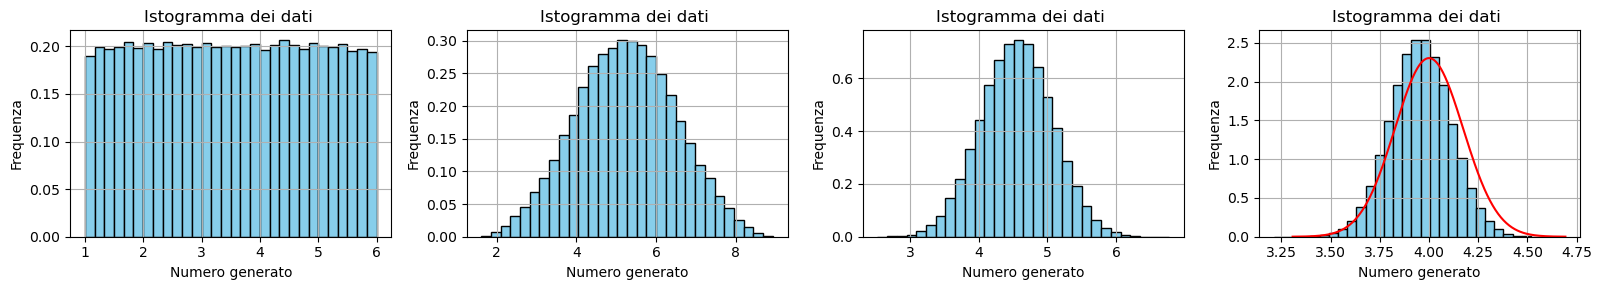

In [39]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3))  # 3 righe, 4 colonne
for j in range(4):
    ax = axs[j]
    valori = leggi_dati_histo(filenames[0], indexes[j])
    ax.hist(valori, bins=30, density = True, color='skyblue', edgecolor='black')
    ax.set_title('Istogramma dei dati ')
    ax.set_xlabel(r'Numero generato')
    ax.set_ylabel('Frequenza')
    ax.grid(True)
    
x,y = plot_gaussian(4, 6/(np.sqrt(12)*10))
plt.plot(x,y, color = 'red')
plt.tight_layout()
plt.show()

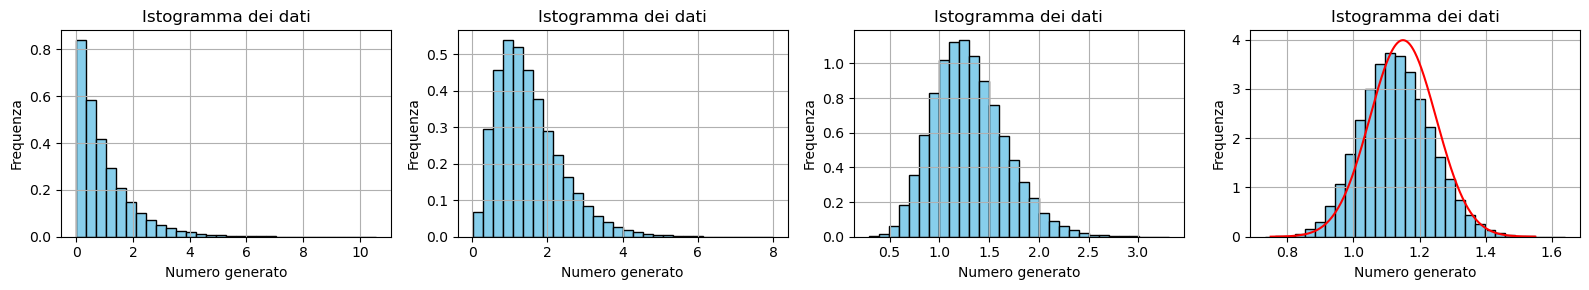

In [48]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3))  # 3 righe, 4 colonne
for j in range(4):
    ax = axs[j]
    valori = leggi_dati_histo(filenames[1], indexes[j])
    ax.hist(valori, bins=30, density = True, color='skyblue', edgecolor='black')
    ax.set_title('Istogramma dei dati')
    ax.set_xlabel(r'Numero generato')
    ax.set_ylabel('Frequenza')
    ax.grid(True)

x,y = plot_gaussian(1.15, 0.1)
plt.plot(x,y, color = 'red')
plt.tight_layout()
plt.show()

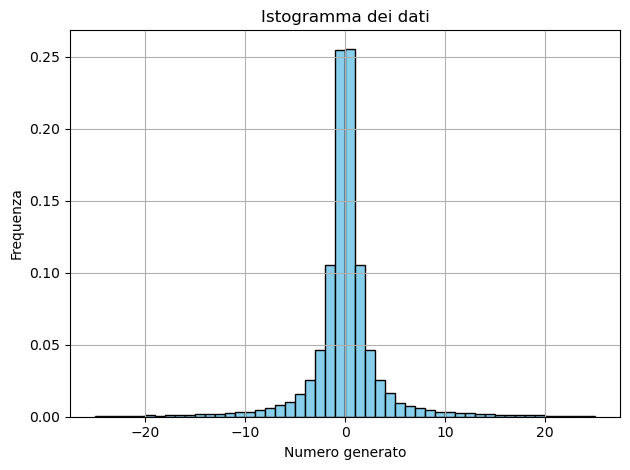

In [17]:
dati = leggi_dati_histo(filenames[2],indexes[0])
plt.hist(dati, range=(-25,25), bins=50, color='skyblue', edgecolor='black', density='true') 
plt.xlabel('Numero generato')
plt.ylabel('Frequenza')
plt.title('Istogramma dei dati')
plt.tight_layout()
plt.grid(True)
plt.show()

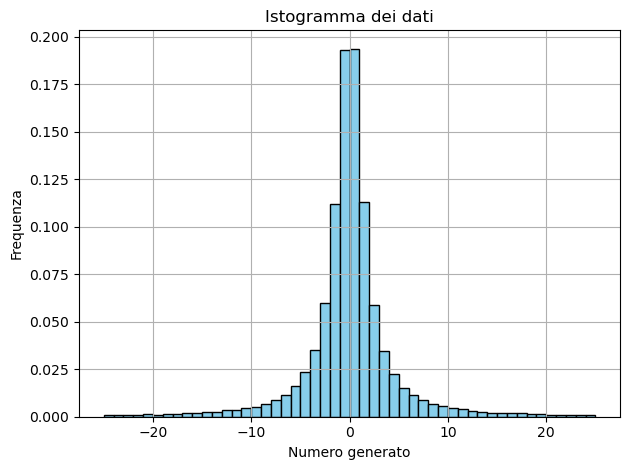

In [18]:
dati = leggi_dati_histo(filenames[2],indexes[1])
plt.hist(dati, range=(-25,25), bins=50, color='skyblue', edgecolor='black', density='true') 
plt.xlabel('Numero generato')
plt.ylabel('Frequenza')
plt.title('Istogramma dei dati')
plt.tight_layout()
plt.grid(True)
plt.show()

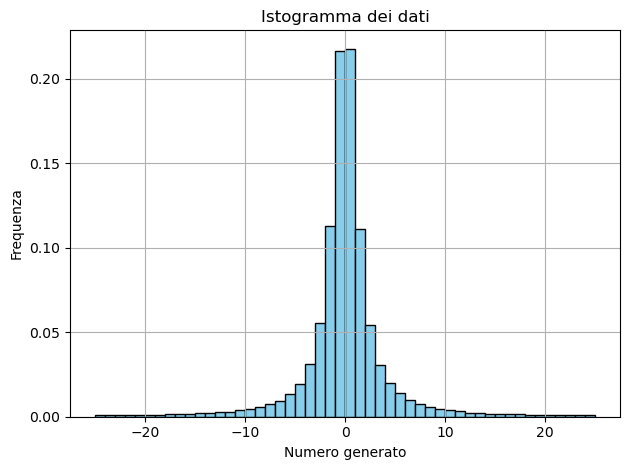

In [19]:
dati = leggi_dati_histo(filenames[2],indexes[2])
plt.hist(dati, range=(-25,25), bins=50, color='skyblue', edgecolor='black', density='true') 
plt.xlabel('Numero generato')
plt.ylabel('Frequenza')
plt.title('Istogramma dei dati')
plt.tight_layout()
plt.grid(True)
plt.show()

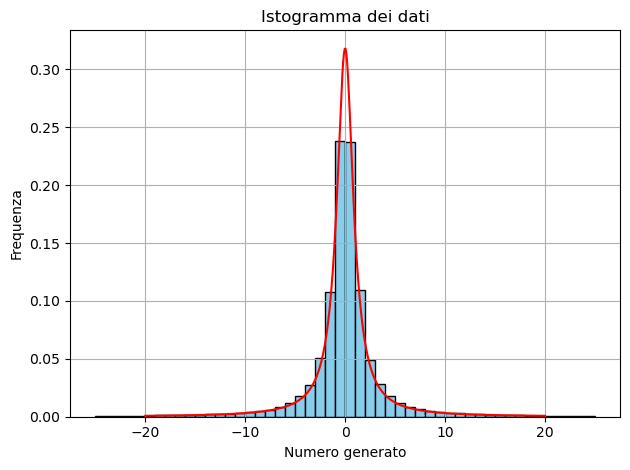

In [63]:
dati = leggi_dati_histo(filenames[2],indexes[3])
plt.hist(dati, range=(-25,25), bins=50, color='skyblue', edgecolor='black', density='true') 
plt.xlabel('Numero generato')
plt.ylabel('Frequenza')
plt.title('Istogramma dei dati')
plt.tight_layout()

x,y = plot_lorentzian(0, 1)
plt.plot(x,y, color = 'red')

plt.grid(True)
plt.show()

## Teorema del limite centrale
In questo esercizio l'obiettivo è mostrare la validità del teorema del limite centrale: considerate N variabili causali indipendenti ugualmente distribuite con valore medio e varianza finiti, la variabile composta definita dalla somma delle variabili casuali diviso il loro numero, è distribuita secondo una distribuzione normale con valore medio pari al valore medio delle componenti e varianza pari alla varianza delle componenti diviso il loro numero.

La verifica l'ho effettuata su tre tipi di distribuzioni: la distribuzione uniforme tra 1 e 7, la distribuzione esponenziale con parametro $\lambda$ = 1.15  e la distribuzione Lorentziana con parametro $\Gamma$ = 1.0 e $\mu$ = 0.0.

Le tre distribuzione le ho implementate sfuttando il generatore di numeri casuali tra 0 ed 1: il primo generatore si ottiene shiftando quello gia presente tra 0 ed 1. Invece il secondo ed il terzo si ottengono applicando il metodo della trasformata inversa.

Nella pratica ho costruito 4 varibiali composte (come spiegato prima) utilizzando 1, 2, 10 e 100 variabili semplici. Ogni istogramma è ottenuto campionando 10000 valori della variabile complessa. 

La prima serie di grafici mostra la convergenza della variabile utilizzando valori uniformi. 

La seconda serie mostra i risultati per i valori esponenziali.

Il terzo grafico mostra i risultati per i valori lorentziani. In questo caso l'integrale della varianza diverge e di conseguenza non vale più il teorema del limite centrale. Tuttavia la nuova variabile è ancora distribuita come una distribuzione lorentziana con medesimo centro e parametro $\Gamma$ delle variabili semplici

---

# Esercizio 1.3

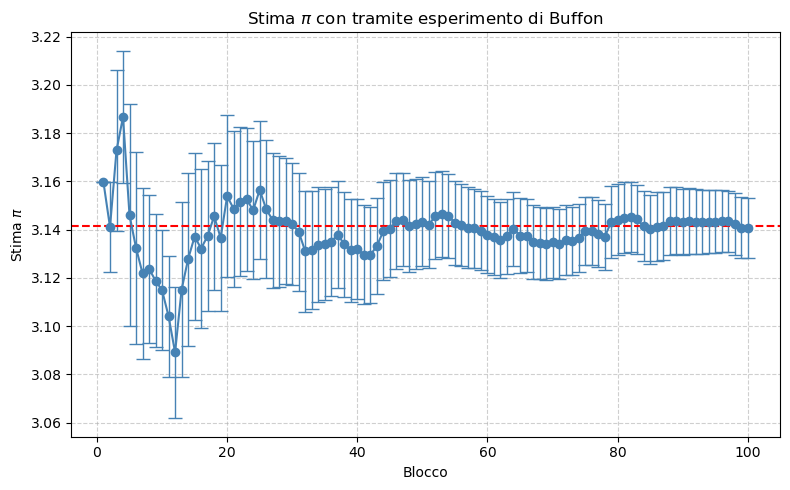

In [68]:
x, y, err = leggi_dati_barre('OUTPUT/results_buffon.dat')

plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=err, fmt='o-', capsize=5, color='steelblue', elinewidth=1)
plt.xlabel('Blocco')
plt.ylabel('Stima 'r'$\pi$')
plt.title('Stima 'r'$\pi$ con tramite esperimento di Buffon')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=3.141592653589793, color='red', linestyle='--')
plt.tight_layout()
plt.show()

## Stima di $\pi$

Nell'ultimo esercizio è richiesta la stima di $\pi$ utilizzando il metodo di Buffon.

L'implementazione si basa sull'idea che il centro dell'ago è estratto con distribuzione uniforme tra 0 e d (dove d è la distanza tra 2 linee) e che l'inclinazione del'ago è estratto tra 0 e $\pi$. Se l'ago intercetta la riga in d o in 0 allora ho una hit.

Per campionare l'angolo tra 0 e $\pi$ ho utilizzato un metodo accept-reject. Il metodo consiste nel campionare uniformemente una coordinata x tra -1 ed 1 ed una coordinata y tra 0 ed 1. Se il punto è all'interno del semicerchio positivo unitario allora calcolo l'inclinazione del vettore posizione ed ottengo l'angolo. Per ottenere un angolo eseguo dei tentativi fino a quando la condizione non si verifica.

La stima di $\pi$ la si ottiene dalla formula di Buffon. La statistica è ottenuta eseguendo 100000 lanci suddivisi in 100 blocchi. In ogni blocco ho eseguito la stima è ho stimato l'incertezza runtime. 